# Step 7: The Machine Learning Workflow

The machine learning workflow is a systematic approach to building and deploying models. In this notebook, we'll go through each of the essential stages of the workflow.

## Table of Contents

1. [Problem Definition](#1-problem-definition)
2. [Data Collection](#2-data-collection)
3. [Data Preprocessing](#3-data-preprocessing)
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis)
5. [Feature Selection and Engineering](#5-feature-selection)
6. [Model Selection](#6-model-selection)
7. [Model Training](#7-model-training)
8. [Model Evaluation](#8-model-evaluation)
9. [Model Tuning](#9-model-tuning)
10. [Model Deployment](#10-model-deployment)

---

## 1. Problem Definition

Define the problem clearly. Identify whether it is a classification, regression, clustering, or another type of problem. Clarify the input and output requirements, objectives, and constraints.

---

## 2. Data Collection

Gather the necessary data from different sources such as databases, files, or APIs. Ensure that the data is representative of the problem you're trying to solve.


In [1]:
import pandas as pd

data = pd.read_csv("iris.csv")

## 3. Data Preprocessing
Data preprocessing involves cleaning and transforming raw data to make it ready for machine learning models. This includes handling missing values, encoding categorical data, and scaling features.

In [5]:
data.fillna(method="ffill",inplace=True)

from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

data["species"] = encoder.fit_transform(data["species"])
scaled_data = scaler.fit_transform(data)

## 4. Exploratory Data Analysis
EDA is used to understand the data better through visualizations and statistical analysis. It helps identify trends, outliers, and relationships among features.

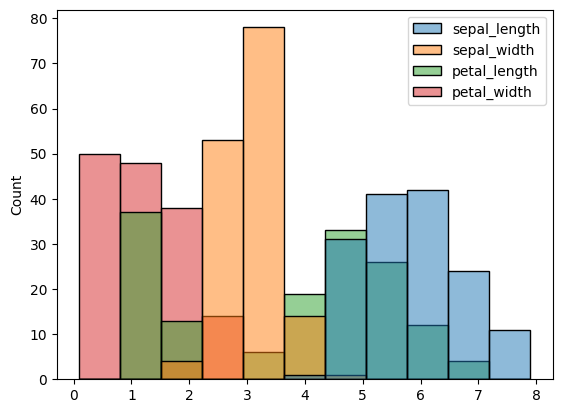

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data.drop(columns=["species"]))
plt.show()

## 5. Feature Selection and Engineering
Select the most relevant features and apply feature engineering techniques to improve model performance. This might involve dimensionality reduction or creating new features.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(columns=["species"])
y= data["species"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
print(importances)

[0.10577675 0.04521288 0.43010953 0.41890084]


## 6. Model Selection
Choose an appropriate machine learning algorithm based on the problem and dataset. Popular algorithms include decision trees, support vector machines, random forests, and neural networks.

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

## 7. Model Training
Train the model on the training dataset, allowing it to learn from the data and optimize its parameters.

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## 8. Model Evaluation
Evaluate the model using a validation or test set to assess its performance. For classification, you can use metrics like accuracy, precision, and recall. For regression, you can use metrics like mean squared error (MSE) or R².

In [15]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


## 9. Model Tuning
Optimize the model's performance by tuning its hyperparameters using techniques like Grid Search or Random Search.

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear']})

## 10. Model Deployment
Deploy the trained model to production so it can make predictions on new data. This can involve saving the model and loading it when needed.

In [17]:
import joblib

joblib.dump(clf, 'model.pkl')

clf = joblib.load('model.pkl')

## 